
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable 1 - Ejercicio 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import os

seaborn.set_context('talk')
seaborn.set(font_scale=1)

## Lectura y limpieza del dataset del ejercicio anterior

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

### 2. Seleccionar las filas relevantes para analizar.


Para la limpieza de los datos nos enfocaremos en:

  * Eliminacion de filas que presenten datos nulos en Salario Bruto y/o Salario Neto.

  * Eliminacion de outliers.

  * Eliminacion de aquellas cuyas respuestas presenten incongruencias logicas. Ejem: Sueldo Neto mayor al Sueldo Bruto; Mayor cantidad de años de experiencia que de años de vida, Sueldo Bruto por debajo del Sueldo Minimo en Argentina, etc. 

Objetivo: Obtener informacion que nos resulte util para el analisis estadistico, y contribuya al grado de veracidad de sus resultados.


Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Seleccionamos las columnas que consideramos relevantes para el analisis
relevant_columns = ['profile_age',
                    'profile_gender',
                    'profile_years_experience',
                    'work_years_in_company',
                    'work_people_in_charge_of',
                    'profile_studies_level',
                    'profile_specialization_courses',
                    'company_employee_number',
                    'company_diversity_policies',
                    'company_extra_benefits',
                    'tools_programming_languages',
                    'tools_frameworks',
                    'tools_data_bases',
                    'work_contract_type',
                    'salary_monthly_NETO',
                    'salary_monthly_BRUTO',
                    'salary_has_bonus'] 

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

programming_language  profile_age profile_gender  profile_years_experience  \
0              ninguno           26          Mujer                       3.0   
1                 html           29         Hombre                       5.0   
1           javascript           29         Hombre                       5.0   
1               python           29         Hombre                       5.0   
2              ninguno           22          Mujer                       2.0   

   work_years_in_company  work_people_in_charge_of profile_studies_level  \
0                    3.0                         0         Universitario   
1                    2.0                         4         Universitario   
1                    2.0                         4         Universitario   
1                    2.0                         4         Universitario   
2                    0.0                         0            Secundario   

                      profile_specialization_courses company_employee_number  \
0                          Sí, los pagó un empleador                501-1000   
1  Sí, de forma particular, Sí, los pagó un emple...                 201-500   
1  Sí, de forma particular, Sí, los pagó un emple...                 201-500   
1  Sí, de forma particular, Sí, los pagó un emple...                 201-500   
2  Sí, de forma particular, Sí, los pagó un emple...               2001-5000   

   company_diversity_policies  \
0                           2   
1                           9   
1                           9   
1                           9   
2                           9   

                              company_extra_benefits  \
0  Capacitaciones y/o cursos, Comidas pagas / sub...   
1  Horarios flexibles, Stock options / RSUs, Viát...   
1  Horarios flexibles, Stock options / RSUs, Viát...   
1  Horarios flexibles, Stock options / RSUs, Viát...   
2  Clases de gimnasia online, Comidas pagas / sub...   

  tools_programming_languages tools_frameworks             tools_data_bases  \
0                     Ninguno          Ninguno                      Ninguna   
1    HTML, Javascript, Python   Django, jQuery  Informix, MySQL, PostgreSQL   
1    HTML, Javascript, Python   Django, jQuery  Informix, MySQL, PostgreSQL   
1    HTML, Javascript, Python   Django, jQuery  Informix, MySQL, PostgreSQL   
2                     Ninguno          Ninguno                      Ninguna   

  work_contract_type  salary_monthly_NETO  salary_monthly_BRUTO  \
0          Full-Time              43000.0               53000.0   
1          Full-Time              63000.0               79000.0   
1          Full-Time              63000.0               79000.0   
1          Full-Time              63000.0               79000.0   
2          Full-Time             127000.0              160000.0   

     salary_has_bonus cured_programming_languages  
0                  No                   [ninguno]  
1  Menos de un sueldo  [html, javascript, python]  
1  Menos de un sueldo  [html, javascript, python]  
1  Menos de un sueldo  [html, javascript, python]  
2           Un sueldo                   [ninguno]

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

language  frequency
0  javascript       2513
1         sql       2154
2        html       1861
3      python       1475
4        java       1453
5         css       1247
6  bash/shell        993
7         php        891
8        .net        823
9  typescript        779

In [ ]:
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [ ]:
df.describe()

profile_age  profile_years_experience  work_years_in_company  \
count   6095.000000               6095.000000            6095.000000   
mean      41.181952                  8.930861               3.311944   
std      665.721175                  7.161094               4.367742   
min       18.000000                  0.000000               0.000000   
25%       27.000000                  3.000000               0.000000   
50%       31.000000                  7.000000               2.000000   
75%       37.000000                 13.000000               4.000000   
max    52000.000000                115.000000              43.000000   

       work_years_in_current_position  work_people_in_charge_of  \
count                     6095.000000               6095.000000   
mean                         2.889770                  2.211649   
std                          3.423228                 32.983395   
min                          0.000000                  0.000000   
25%                          1.000000                  0.000000   
50%                          2.000000                  0.000000   
75%                          4.000000                  0.000000   
max                         34.000000               2500.000000   

       salary_on_call_duty_charge  salary_monthly_BRUTO  salary_monthly_NETO  \
count                 6095.000000          6.095000e+03         5.883000e+03   
mean                   664.042084          1.240585e+05         9.490795e+04   
std                  10540.523461          1.229124e+05         9.686226e+04   
min                      0.000000          1.000000e+00         1.000000e+00   
25%                      0.000000          6.159500e+04         5.148000e+04   
50%                      0.000000          9.600000e+04         7.800000e+04   
75%                      0.000000          1.450000e+05         1.060000e+05   
max                 650000.000000          2.180000e+06         2.080000e+06   

       salary_satisfaction  salary_comparison_last_semester  \
count          6095.000000                      6095.000000   
mean              2.619524                         2.363577   
std               0.858621                         0.945713   
min               1.000000                         1.000000   
25%               2.000000                         2.000000   
50%               3.000000                         2.000000   
75%               3.000000                         3.000000   
max               4.000000                         4.000000   

       salary_percentage_inflation_adjustment_2020  \
count                                  6095.000000   
mean                                     10.444511   
std                                      12.860433   
min                                       0.000000   
25%                                       0.000000   
50%                                       7.000000   
75%                                      18.000000   
max                                     100.000000   

       salary_month_last_inflation_adjustment  company_recommended  \
count                             6095.000000          6095.000000   
mean                                 2.785562             7.340115   
std                                  2.837195             2.024057   
min                                  0.000000             1.000000   
25%                                  0.000000             6.000000   
50%                                  2.000000             8.000000   
75%                                  6.000000             9.000000   
max                                  8.000000            10.000000   

       company_diversity_policies  
count                 6095.000000  
mean                     7.621001  
std                      2.324034  
min                      1.000000  
25%                      6.000000  
50%                      8.000000  
75%                     10.000000  
max                     10.000000

In [ ]:
# Creamos una nueva base de datos con las columnas seleccionadas
df_columns = df[relevant_columns].copy()
# Vemos la cantidad de valores nulos en las columnas seleccionadas
df_columns.isnull().sum()

profile_age                         0
profile_gender                      0
profile_years_experience            0
work_years_in_company               0
work_people_in_charge_of            0
profile_studies_level               0
profile_specialization_courses      0
company_employee_number             0
company_diversity_policies          0
company_extra_benefits              1
tools_programming_languages         1
tools_frameworks                    1
tools_data_bases                    2
work_contract_type                  0
salary_monthly_NETO               212
salary_monthly_BRUTO                0
salary_has_bonus                    0
cured_programming_languages         0
dtype: int64

In [ ]:
# Eliminamos las filas que presenten valores nulos en alguna de las columnas seleccionadas
df_columns.dropna(inplace=True)
# Chequeamos que efectivamente se hayan eliminado de la base de datos
df_columns.isnull().sum()

profile_age                       0
profile_gender                    0
profile_years_experience          0
work_years_in_company             0
work_people_in_charge_of          0
profile_studies_level             0
profile_specialization_courses    0
company_employee_number           0
company_diversity_policies        0
company_extra_benefits            0
tools_programming_languages       0
tools_frameworks                  0
tools_data_bases                  0
work_contract_type                0
salary_monthly_NETO               0
salary_monthly_BRUTO              0
salary_has_bonus                  0
cured_programming_languages       0
dtype: int64

In [ ]:
df_columns = df_columns[df_columns['work_people_in_charge_of'] < 25]

In [ ]:
df_columns['work_people_in_charge_of'].unique()

array([ 0,  4,  5,  3, 14,  7, 16,  2, 24,  1,  9, 20, 10, 17,  6, 15,  8,
       12, 18, 11, 22, 13, 19, 21, 23])

In [ ]:
# Eliminamos valores por fuera del 2do y 3er cuartil
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    
    Q1 = interesting_col.quantile(0.25)
    Q3 = interesting_col.quantile(0.75)
    IQR = Q3 - Q1
    
    return dataset[~((interesting_col < (Q1 - 1.5 * IQR)) | (interesting_col > (Q3 + 1.5 * IQR)))]

In [ ]:
# Observamos los valores para cada una de las columnas seleccionadas
df_columns.describe()

profile_age  profile_years_experience  work_years_in_company  \
count   5805.000000               5805.000000            5805.000000   
mean      41.483032                  8.775814               3.289371   
std      682.146336                  7.089755               4.314082   
min       18.000000                  0.000000               0.000000   
25%       27.000000                  3.000000               0.000000   
50%       31.000000                  7.000000               2.000000   
75%       37.000000                 13.000000               4.000000   
max    52000.000000                115.000000              43.000000   

       work_people_in_charge_of  company_diversity_policies  \
count               5805.000000                 5805.000000   
mean                   1.145392                    7.606891   
std                    2.961774                    2.330724   
min                    0.000000                    1.000000   
25%                    0.000000                    6.000000   
50%                    0.000000                    8.000000   
75%                    0.000000                   10.000000   
max                   24.000000                   10.000000   

       salary_monthly_NETO  salary_monthly_BRUTO  
count         5.805000e+03          5.805000e+03  
mean          9.402178e+04          1.205251e+05  
std           9.668463e+04          1.198280e+05  
min           1.000000e+00          1.000000e+00  
25%           5.100000e+04          6.040700e+04  
50%           7.700000e+04          9.500000e+04  
75%           1.050000e+05          1.400000e+05  
max           2.080000e+06          2.180000e+06

In [ ]:
# Procedemos a eliminar outliers y visualizar nuevamente los resultados
df_outliers = clean_outliers(df_columns,relevant_columns)
df_outliers.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


profile_age  profile_years_experience  work_years_in_company  \
count  5731.000000               5718.000000            5395.000000   
mean     32.139243                  8.410913               2.373457   
std       6.707903                  6.387773               2.581496   
min      18.000000                  0.000000               0.000000   
25%      27.000000                  3.000000               0.000000   
50%      31.000000                  7.000000               2.000000   
75%      37.000000                 12.000000               3.000000   
max      52.000000                 28.000000              10.000000   

       work_people_in_charge_of  company_diversity_policies  \
count                    4439.0                 5805.000000   
mean                        0.0                    7.606891   
std                         0.0                    2.330724   
min                         0.0                    1.000000   
25%                         0.0                    6.000000   
50%                         0.0                    8.000000   
75%                         0.0                   10.000000   
max                         0.0                   10.000000   

       salary_monthly_NETO  salary_monthly_BRUTO  
count          5433.000000           5438.000000  
mean          76012.751919          98197.371650  
std           36904.975237          53098.215025  
min               1.000000              1.000000  
25%           50000.000000          60000.000000  
50%           74000.000000          90000.000000  
75%          100000.000000         130000.000000  
max          186000.000000         259000.000000

In [ ]:
# Creamos un nuevo dataset reindexado
df_final = df_outliers.reset_index(level=-1, drop=True)

In [ ]:
# Buscamos aquellas filas cuyas respuestas presenten incongruencias logicas
condition_salary_NETO = (df_final['salary_monthly_NETO'] > df_final['salary_monthly_BRUTO']) 
result_salary_NETO = df_final[condition_salary_NETO].salary_monthly_NETO.count()

condition_year_experience = (df_final['profile_years_experience'] > df_final['profile_age'])
result_years_experience = df_final[condition_year_experience].profile_years_experience.count()
print('Cantidad de valores incongruentes en Salario NETO: ', result_salary_NETO,
      '\nCantidad de valores incongruentes en Años de Experiencia: ', result_years_experience,
      '\nIndice de valores incongruentes',df_final[condition_salary_NETO].salary_monthly_NETO.index)
remove_rows_salary = df_final.index[condition_salary_NETO].tolist()

Cantidad de valores incongruentes en Salario NETO:  140 
Cantidad de valores incongruentes en Años de Experiencia:  0 
Indice de valores incongruentes Int64Index([  11,   21,  154,  237,  459,  514,  575,  597,  673,  675,
            ...
            5492, 5502, 5537, 5540, 5569, 5576, 5690, 5700, 5719, 5747],
           dtype='int64', length=140)


In [ ]:
# Eliminamos aquellas filas cuyas respuestas presenten incongruencias logicas
df_final.drop(df_final.index[remove_rows_salary], inplace=True)

# Chequeamos nuevamente por valores nulos
df_final.isnull().sum()
# Eliminamos las filas que presenten valores nulos en alguna de las columnas seleccionadas
df_final.dropna(inplace=True)
# # Chequeamos que efectivamente se hayan eliminado de la base de datos
df_final.isnull().sum()

profile_age                       0
profile_gender                    0
profile_years_experience          0
work_years_in_company             0
work_people_in_charge_of          0
profile_studies_level             0
profile_specialization_courses    0
company_employee_number           0
company_diversity_policies        0
company_extra_benefits            0
tools_programming_languages       0
tools_frameworks                  0
tools_data_bases                  0
work_contract_type                0
salary_monthly_NETO               0
salary_monthly_BRUTO              0
salary_has_bonus                  0
cured_programming_languages       0
dtype: int64

In [ ]:
df_final.describe()

profile_age  profile_years_experience  work_years_in_company  \
count  3853.000000               3853.000000            3853.000000   
mean     30.688035                  6.718064               2.045186   
std       6.129763                  5.557688               2.375112   
min      18.000000                  0.000000               0.000000   
25%      26.000000                  2.000000               0.000000   
50%      30.000000                  5.000000               1.000000   
75%      34.000000                 10.000000               3.000000   
max      52.000000                 28.000000              10.000000   

       work_people_in_charge_of  company_diversity_policies  \
count                    3853.0                 3853.000000   
mean                        0.0                    7.685440   
std                         0.0                    2.275927   
min                         0.0                    1.000000   
25%                         0.0                    6.000000   
50%                         0.0                    8.000000   
75%                         0.0                   10.000000   
max                         0.0                   10.000000   

       salary_monthly_NETO  salary_monthly_BRUTO  
count          3853.000000           3853.000000  
mean          71484.485281          92849.138365  
std           34642.749676          48629.489875  
min               1.000000              1.000000  
25%           46000.000000          56000.000000  
50%           69000.000000          85000.000000  
75%           93770.000000         123000.000000  
max          186000.000000         255000.000000

In [ ]:
# Obtenemos una lista con los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.

def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

df.loc[:, 'cured_programming_languages'] = df_final.tools_programming_languages\
    .apply(split_languages)

df_final_lang = df_final.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_final[relevant_columns])\
    .rename(columns={0: 'programming_language'})

language_count = df_final_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

language_count


language  frequency
0    javascript       1584
1           sql       1356
2          html       1156
3          java        926
4        python        891
..          ...        ...
143      apache          1
144         lex          1
145        yacc          1
146     unreal)          1
147   infobasic          1

[148 rows x 2 columns]

In [ ]:
# Quitamos de la lista aquellos que no son lenguajes de programacion, y visualizamos la distribucion de los lenguajes relevantes
most_used_languages = language_count[language_count.frequency>language_count.frequency.quantile(.95)].language.tolist()
most_used_languages.remove('sql') # Not a programming language
most_used_languages.remove('html') # Not a programming language
most_used_languages.remove('css') # Not a programming language
most_used_languages.remove('bash/shell') # Not a programming language

interesting_languages = language_count[language_count.language.isin(most_used_languages)]
interesting_languages

language  frequency
0  javascript       1584
3        java        926
4      python        891
7        .net        495

In [ ]:
# Creamos un dataset curado [dataset] el cual contrastaremos con [df_final_lang] que incluye el total de los datos curados (todos los lenguajes)
dataset = df_final_lang[df_final_lang.programming_language.isin(interesting_languages.language)].copy()
print(dataset.salary_monthly_NETO.describe(), os.linesep, os.linesep, df_final_lang.salary_monthly_NETO.describe())

# Reseteamos el indice y creamos una nueva columna que nos permita identificar a los individuos que respondieron
dataset.reset_index(inplace=True)
dataset.rename(columns={'index':'profile_id'},inplace=True)

count      3896.000000
mean      75074.117837
std       35214.455066
min           1.000000
25%       50000.000000
50%       73770.000000
75%       98000.000000
max      185000.000000
Name: salary_monthly_NETO, dtype: float64 
 
 count     10935.000000
mean      73544.909029
std       35356.984188
min           1.000000
25%       48930.500000
50%       71000.000000
75%       96670.000000
max      186000.000000
Name: salary_monthly_NETO, dtype: float64


### 3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas.


Para el analisis de los datos nos enfocaremos en:

  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.


In [ ]:
top_languages = language_count[language_count.language.isin(most_used_languages)]
top_languages

language  frequency
0  javascript       1584
3        java        926
4      python        891
7        .net        495

Visualizamos la distribucion dentro de la subpoblacion de lenguajes mas utilizados por los programadores

  * Javascript es el mas utilizado
  * Hay mayor cantidad de desarrolladores backend que front-end. 
  
Agrupados por tipo de tecnologia podemos observar que el lenguaje Javascript utilizado para desarrollo front-end, representa un 40% de la distribucion y los lenguajes Java, Python y .Net, utilizados para el desarrollo backend, representan en conjunto el 60% de la distribucion.  

In [ ]:
dataset = dataset[dataset['salary_monthly_NETO'] > 20000]


Para lo siguiente considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**



##Resolución
 
Podemos explorar las base de datos para descubrir patrones y asociaciones de muchas formas, las herramientas mas utilizadas podria enlistarse como:

**Visualizaciones:** podemos usar bloxplots para ver la distribucion de los datos si al mismo tiempo nos interesa analizar su continuidad  los histogramas y nos ayudan bastante. Los graficos de linea son otra buena opcion para analizar tendencias.

**Estadisticos:** podemos usar diferentes estadisticos y modelos (como seran usados en la segunda parte del entregable).

**Probabilidad:** utilizando probabilidad conjunta y condicional tambien podemos mostrar las relaciones que se dan entre las variables.

-------------

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

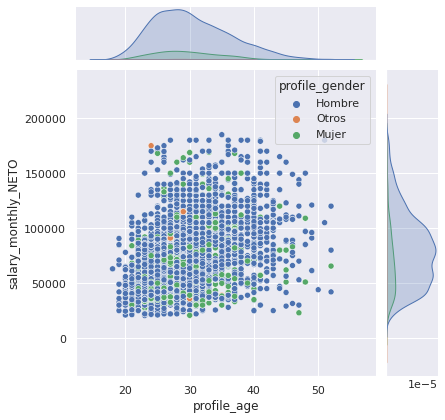

In [ ]:
seaborn.jointplot(data=dataset, x="profile_age", y="salary_monthly_NETO", hue="profile_gender")

En el gráfico anterior podemos ver la densidad cojunta de las varables numericas Edad y Salario Neto, diferenciado por la variable categorica genero.

## b) Asociación

Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría


Para poder analizar la correlación vamos a utilizar la funcion "corr" para ver el grado de correlación de estas dos variables, al mismo tiempo plotearemos estos resultados en un mapa de calor. Esto nos permite al mismo tiempo explorar un poco la correlación del resto de las columnas.

In [ ]:
# Compute the correlation matrix
corr = dataset.corr()


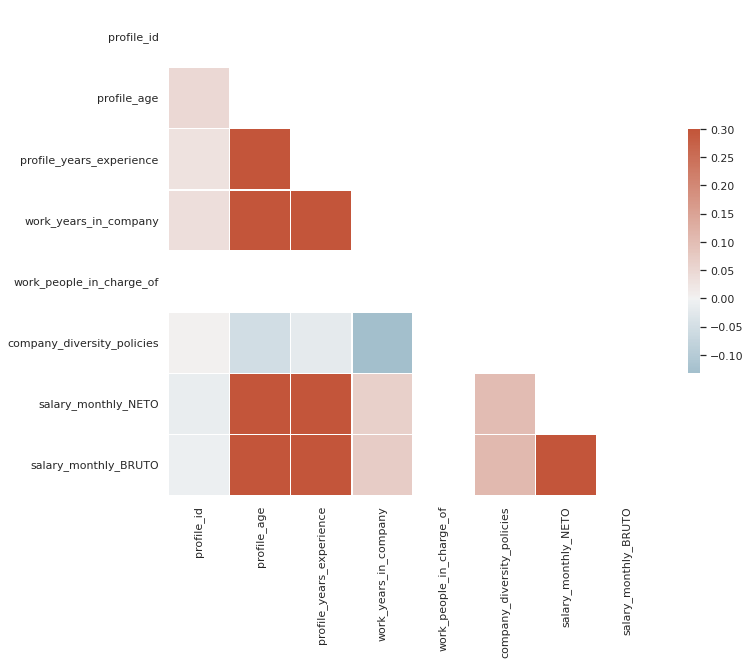

In [ ]:
from string import ascii_letters
import matplotlib.pyplot as plt

seaborn.set_theme(style="white")

# Generate a mask for the upper triangle
mask = numpy.triu(numpy.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
correlacion = corr.salary_monthly_BRUTO["salary_monthly_NETO"]
print("La correlación entre las dos variables es: ", round(correlacion,2))

La correlación entre las dos variables es:  0.96


Al ver que tenemos una correlacion de 0.96 entre estas dos variables podemos afirmar que estar fuertemente correlacionadas y por lo tanto se podria eliminar una de estas dos para simplificar la encuesta.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación


Procedemos a agrupar los niveles de estudio en dos nuevas polaciones: 

- Formación de grado:

  - "Universitario"
  - "Posgrado"
  - "Doctorado"
  - "Posdoctorado"

- Sin formación de grado:

  - "Secundario"
  - "Primario"
  - "Terciario"


In [ ]:
#reemplazamos segun los grupos mencionados arriba
df_agrupado = dataset.replace(to_replace=["Universitario","Posgrado","Doctorado","Posdoctorado"], value='Formacion de grado', regex=True)
df_agrupado = df_agrupado.replace(to_replace=["Secundario","Primario","Terciario"], value='Formacion de pre-grado', regex=True)

[Text(0.5, 0, 'Años de experiencia')]

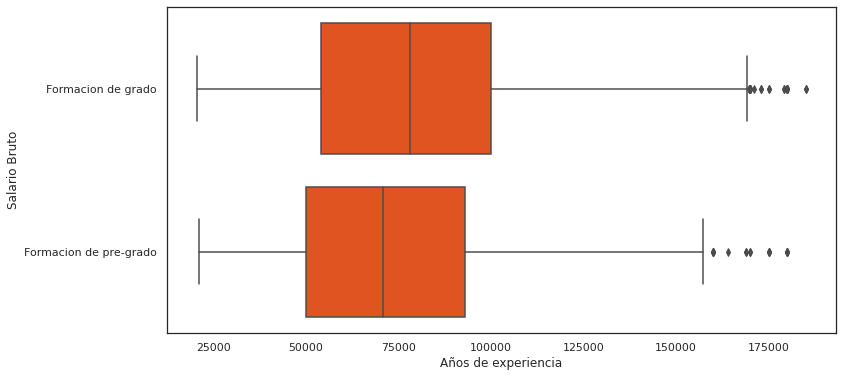

In [ ]:
plt.figure(figsize=(12, 6))

ax = seaborn.boxplot(data=df_agrupado, x="salary_monthly_NETO", y='profile_studies_level',
                color='orangered')

plt.ticklabel_format(style='plain', axis='x')

ax.set(ylabel="Salario Bruto")
ax.set(xlabel="Años de experiencia")

In [ ]:
df_agrupado.profile_studies_level.value_counts()

Formacion de grado        2781
Formacion de pre-grado     933
Name: profile_studies_level, dtype: int64

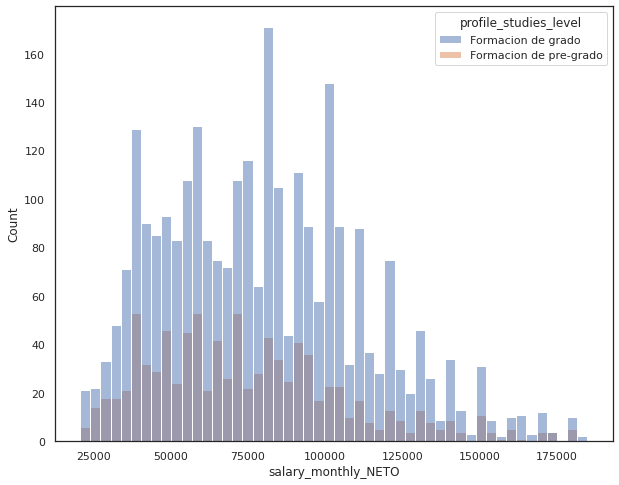

In [ ]:
fig = plt.figure(figsize=(10, 8))

seaborn.histplot(df_agrupado,
                 x="salary_monthly_NETO",
                 hue="profile_studies_level",
                 bins=50);

Podemos ver que la distribucion presenta una tendencia a cobrar mas contando con formacion de grado o superior.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)

Vamos a elegir para analizar la relacion entre años de experiencia y salario, visualizando al mismo tiempo a que genero pertenece este conjunto de valores.

[Text(0.5, 0, 'Años de experiencia')]

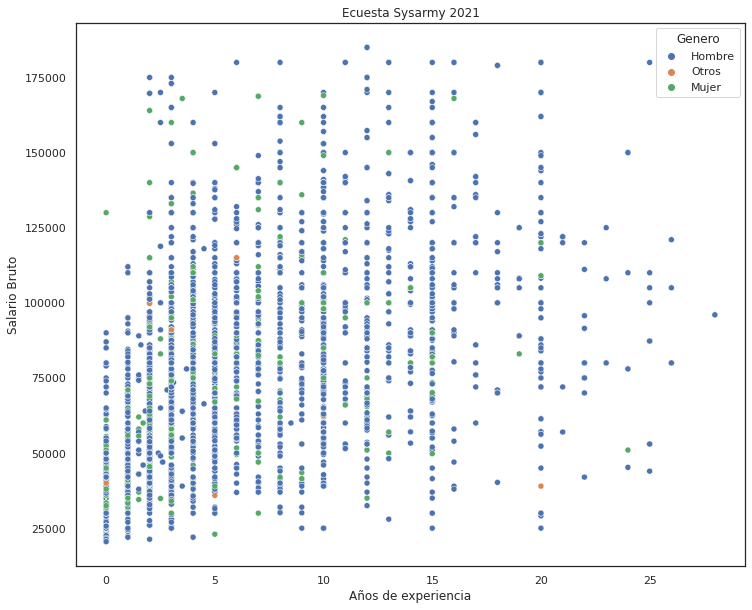

In [ ]:
plt.figure(figsize=(12, 10))

dataset["Genero"] = dataset["profile_gender"]

ax = seaborn.scatterplot(data=dataset,
                    x="profile_years_experience",
                    y="salary_monthly_NETO",
                    hue="Genero");

ax.set_title("Ecuesta Sysarmy 2021")
ax.set(ylabel="Salario Bruto")
ax.set(xlabel="Años de experiencia")

Podemos ver que a medida que aumentan los años de experiencia se nota una clara diferencia entre los sueldos promedios de los hombres contra el resto de la poblacion.